### Importando paquetes

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Task#1: Agregando los archivos de 12 meses en uno solo

In [2]:
#df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# Agrego todos los files csv a la variable files
files = [file for file in os.listdir('./Sales_Data')] 

all_months_data = pd.DataFrame()
# por cada csv se ira agregando al dataframe all_months_data para tener un archivo con todos los datos

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
print(all_months_data.head())

all_months_data.to_csv('all_data.csv') #guardandolo como archivo csv


all_data = pd.read_csv("all_data.csv")
print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
   Unnamed: 0 Order ID                     Product Quantity Ordered  \
0           0   176558        USB-C Charging Cable                2   
1           1      NaN                         NaN              NaN   
2           2   17

#### Task#2: Agregando columna de meses

In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2] # esto para obtener los primeros 2 caracters de la columna order date
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Limpiando los datos

In [14]:

nan_df = all_data[all_data.isna().any(axis=1)]# filtrar y obtener las filas NaN 
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head(100)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...,...
96,96,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016",04
97,97,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215",04
98,98,176651,iPhone,1,700,04/07/19 13:14,"997 South St, Boston, MA 02215",04
99,99,176652,LG Washing Machine,1,600.0,04/09/19 20:04,"502 14th St, New York City, NY 10001",04


### Encontrando 'Or'


In [17]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #al utilizar str[0:2] solo agarrabamos los primeros 2 datos, como anterior mente 
# juntamos los csv de cada mes para juntarlos en uno solo, los data frames de antes se convirtieron en columnas
#por eso agarraba el 'or' de Order date


### Convirtiendo las columnas Quantity Ordered y Price Each al tipo de dato correcto

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Convertir a int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Convertir a float

#### Task#3: Agregar una columna llamada Sales

In [21]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task#4: Agregar una columna llamada ciudades

In [35]:
# apply()
def get_city(address):
    return address.split(',')[1]
all_data['Towns'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Towns
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### Q1: What was the best month for sales? How much was earned that month?

In [26]:
results = all_data.groupby('Month').sum()

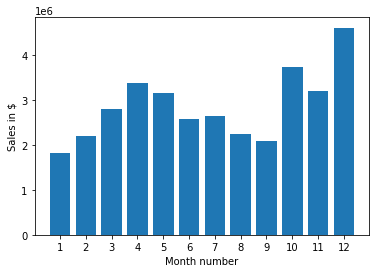

In [31]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in $')#each represente by millons
plt.xlabel('Month number')
plt.show()

#### Q2: Que ciudad tiene el mayor numero de ventas?

In [39]:
results = all_data.groupby('Towns').sum()
results

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
Towns,,,,,
Atlanta,122928154,16602,2779908.20,104794,2795498.58
Austin,82709457,11153,1809873.61,69829,1819581.75
Boston,165758780,22528,3637409.77,141112,3661642.01
Dallas,124308328,16730,2752627.82,104620,2767975.40
Los Angeles,247743297,33289,5421435.23,208325,5452570.80
New York City,208439450,27932,4635370.83,175741,4664317.43
Portland,104043698,14053,2307747.47,87765,2320490.61
San Francisco,372569180,50239,8211461.74,315520,8262203.91
Seattle,122394893,16553,2733296.01,104941,2747755.48


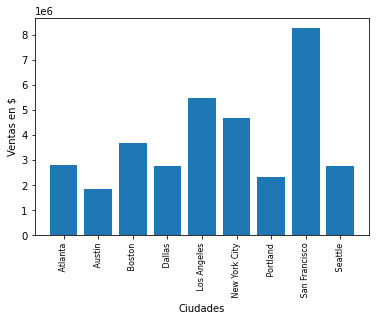

In [41]:
cities = [city for city, df in all_data.groupby('Towns')] #all_data['Towns'].unique()
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Ventas en $')
plt.xlabel('Ciudades')
plt.show()

#### A qué hora debemos mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?

In [43]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [54]:
all_data['Order Hour'] = all_data['Order Date'].dt.hour
all_data['Order Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Towns,Order Hour,Order Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


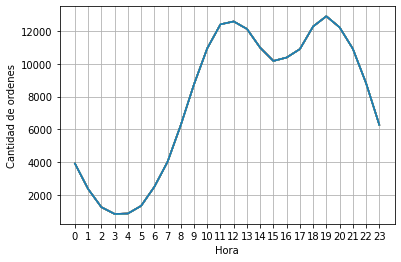

In [62]:
hours = [hour for hour, df in all_data.groupby('Order Hour')]

plt.plot(hours, all_data.groupby(['Order Hour']).count())
plt.xticks(hours)
plt.xlabel('Hora')
plt.ylabel('Cantidad de ordenes')
plt.grid()
plt.show()

#### Que productos son los mas vendidos?

In [67]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(30)

C:\Users\Pablo\AppData\Local\Temp/ipykernel_16092/1024206860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [71]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Que producto se vendio mas? y Por que?

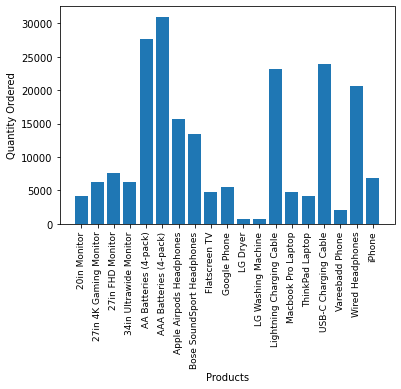

In [78]:
product_group = all_data.groupby('Product')
#product_group.sum()

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [products for products, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products,rotation='vertical',size=9)
plt.show()

C:\Users\Pablo\AppData\Local\Temp/ipykernel_16092/426107810.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=9)


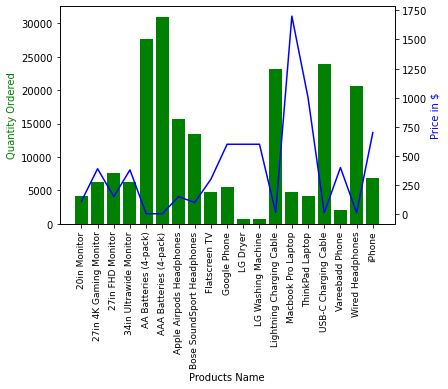

In [83]:
prices = all_data.groupby('Product').mean()['Price Each']
#print(prices)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in $', color='b')
ax1.set_xticklabels(products, rotation='vertical',size=9)
plt.show()
